<h3>Suppose we observe 11 data points given by:
    <br>
x = [0:0.1:1]
    <br><br>
b = sin(2*pi*x)
    <br><br>
plot(x,b,'go')
<br><br>
Problem #1
<br>
Fit the data with a third order polynomial as we did in class and compare the results of the weights, w, with the Taylor series values for thecoefficients of a power series approximation to sine and plot the results. Do the same for a ninth order model, M=9.</h3>

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt


In [2]:
#paramter 'm' represents the order
def PolynomialFit(m, b):
    # initializing design matrix A with zeros
    A =np.zeros([11, m+1], dtype = float) 
    
    # first column: All rows are always 1.We already know x[0] is always ON because we need that bias parameter
    # second column: All rows will be x values
    # third column: all rows will be x sequared 
    # fourth column: all rows will be x cube
    # and so on.....
    A[:,0]=1 
    for i in range(1,m+1):
        A[:,i]=X ** i
    
    # A.T is A transponse where rows becomes columns
    #A.T multiply by A makes the square matrix smaller
    
    #get weight
    w = np.dot(np.linalg.inv(np.dot(A.T, A)),(np.dot(A.T,b)))
    print('\x1b[1;32m'+'here are the weights for M='+ str(m)+' order polynomial:\n\n'+'\x1b[0m')
    print('\x1b[1;32m'+ str(w)+' order polynomial:\n\n'+'\x1b[0m')
   

    
    #guess
    y = np.dot(A,w)
    print('\x1b[1;32m'+ 'here is the guess we found:\n\n'+'\x1b[0m')
    print('\x1b[1;32m'+ str(y)+'\x1b[0m')
    
    return y

<b>generating 11 data points</b>

In [3]:
X = np.arange(0, 1.1, 0.1) # start,stop,step
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [4]:
b = np.sin(2*np.pi*X)
b

array([ 0.00000000e+00,  5.87785252e-01,  9.51056516e-01,  9.51056516e-01,
        5.87785252e-01,  1.22464680e-16, -5.87785252e-01, -9.51056516e-01,
       -9.51056516e-01, -5.87785252e-01, -2.44929360e-16])

<b>plotting X Vs b</b>

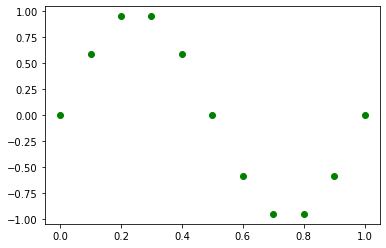

In [5]:
plt.plot(X, b, 'go')

In [6]:
# making b as a column vector to make the matrix multiplication work
b = b.T
b

array([ 0.00000000e+00,  5.87785252e-01,  9.51056516e-01,  9.51056516e-01,
        5.87785252e-01,  1.22464680e-16, -5.87785252e-01, -9.51056516e-01,
       -9.51056516e-01, -5.87785252e-01, -2.44929360e-16])

### Fitting the data with a third order polynomial

In [7]:
m=3
y3 = PolynomialFit(3, b)

here are the weights for M=3 order polynomial:


[ -0.06350896  10.723997   -31.79093723  21.19395815] order polynomial:


here is the guess we found:


[-6.35089622e-02  7.12175324e-01  9.79204614e-01  8.64742657e-01
  4.95953203e-01 -3.55271368e-15 -4.95953203e-01 -8.64742657e-01
 -9.79204614e-01 -7.12175324e-01  6.35089622e-02]


<b>plotting data in green circles and plotting guess in red stars</b>

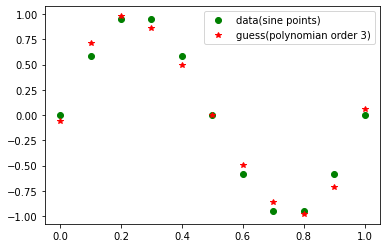

In [8]:
plt.plot(X, b, 'go',  label='data(sine points)')
plt.plot(X,y3,'r*', label='guess(polynomian order 3)')
plt.legend()

We got good agreement between red stars and green circles. Green circles are our actual data. Red stars are our guess.Our model is tracking pretty well to the data.

<b>error: sum(sqr(guess-target))</b>

In [9]:
error = np.sum(np.square(y3-b))
error

0.07236360201799699

### Taylor series values for thecoefficients of a power series approximation to sine

In [10]:
def getTaylorSeriesValues(x, n):
    sin_x=0
    for i in range(n+1):
        sin_x+=(-1)**i *(x**(2*i+1))/math.factorial(2*i+1)

    return sin_x

here are the weights for M=3 order polynomial:


[  0.06350896 -10.723997    31.79093723 -21.19395816] order polynomial:


here is the guess we found:


[ 6.35089627e-02 -7.12175323e-01 -9.79204614e-01 -8.64742657e-01
 -4.95953203e-01  1.06581410e-14  4.95953203e-01  8.64742657e-01
  9.79204614e-01  7.12175323e-01 -6.35089627e-02]


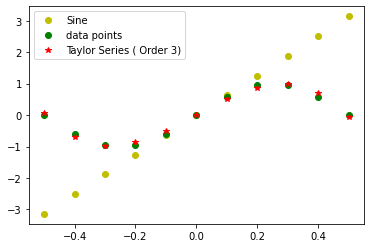

In [39]:
m = 3 # third order polynomial
ts_x = np.linspace(-0.5,0.5,11)  # taking this range as mentioned by Professor in email: The Taylor series coefficients 
#for sine are traditionally centered about 0,from -pi to pi, or in our case, from -0.5 to 0.5 for sin(2*pi*x).
#This range will give you a better match with the least squares coefficients, vs. the range 0 to 1. 

ts_b = getTaylorSeriesValues((2*np.pi*ts_x), 9)
ts_y = PolynomialFit(m, ts_b)

plt.plot(ts_x, (np.pi*2*ts_x), 'yo', label = 'Sine')
plt.plot(ts_x, ts_b, 'go',label='data points')
plt.plot(ts_x,ts_y,'r*', label='Taylor Series ( Order 3)')
plt.legend()

<b>error: sum(sqr(guess-target))</b>

In [12]:
error = np.sum(np.square(ts_y-ts_b))
error

6.709489433855732e+21

### Fitting the data with a 9 order polynomial

In [13]:
m = 9
y = PolynomialFit(9, b)

here are the weights for M=9 order polynomial:


[ 9.13458389e-05  6.27828768e+00  1.30703449e-01 -4.28775253e+01
  9.92044067e+00  4.25054932e+01  9.83248291e+01 -2.34947754e+02
  1.55141174e+02 -3.44758148e+01] order polynomial:


here is the guess we found:


[ 9.13458389e-05  5.87843069e-01  9.51096247e-01  9.51087646e-01
  5.87812671e-01  2.53485960e-05 -5.87763028e-01 -9.51041239e-01
 -9.51055588e-01 -5.87811555e-01 -7.43252713e-05]


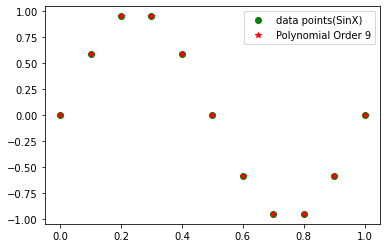

In [14]:
plt.plot(X, b, 'go',  label='data points(SinX)')
plt.plot(X, y,'r*', label='Polynomial Order 9')
plt.legend()

<b>error</b>

In [15]:
error = np.sum(np.square(y-b))
error

2.2572982845518062e-08

In [16]:
#plt.plot(X, b, 'go',  label='Sine points')
#plt.plot(X,ts_y4,'r*', label='Taylor Series Sine')
#plt.plot(X,ts_b4,'b*', label='Weight-Based Line 3rd order')
#plt.plot(X,ts_b9,'y*', label='Weight-Based Line 9th order')
#plt.legend()

<h3>Problem #2
    <br>
    <br>
Suppose we were given noisy initial data:
    <br>
b = sin(2*pi*x) - 0.1 + 0.2*rand(1,11)
    <br>
Fit the data with several models: M = 0, M = 1, M = 3, and M = 9. Plot and comment on the results.</h3>

In [17]:
from numpy import random

<b>generating data points</b>

In [18]:
X=np.arange(0, 1.1, 0.1) # start,stop,step
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [19]:
b = np.sin(2*np.pi*X)-0.1+0.2*random.rand(1,11)
b=b[0]
b

array([ 0.06204992,  0.53014591,  1.0352404 ,  0.97700492,  0.63790847,
       -0.01063808, -0.66982967, -0.86364115, -0.99547111, -0.65984317,
       -0.00852198])

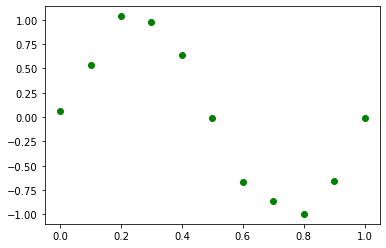

In [20]:
plt.plot(X, b, 'go')

In [21]:
# making b as a column vector to make the matrix multiplication work
b=b.T
b

array([ 0.06204992,  0.53014591,  1.0352404 ,  0.97700492,  0.63790847,
       -0.01063808, -0.66982967, -0.86364115, -0.99547111, -0.65984317,
       -0.00852198])

### Fitting the data with M=0 order polynomial

In [22]:
m = 0
y0 = PolynomialFit(0, b)

here are the weights for M=0 order polynomial:


[0.00312768] order polynomial:


here is the guess we found:


[0.00312768 0.00312768 0.00312768 0.00312768 0.00312768 0.00312768
 0.00312768 0.00312768 0.00312768 0.00312768 0.00312768]


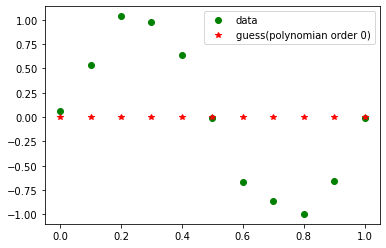

In [23]:
plt.plot(X, b, 'go',  label='data')
plt.plot(X, y0,'r*', label='guess(polynomian order 0)')
plt.legend()

### Fitting the data with M=1 order polynomial

In [24]:
m = 1
y1 = PolynomialFit(1, b)

here are the weights for M=1 order polynomial:


[ 0.73921771 -1.47218006] order polynomial:


here is the guess we found:


[ 0.73921771  0.5919997   0.44478169  0.29756369  0.15034568  0.00312768
 -0.14409033 -0.29130833 -0.43852634 -0.58574434 -0.73296235]


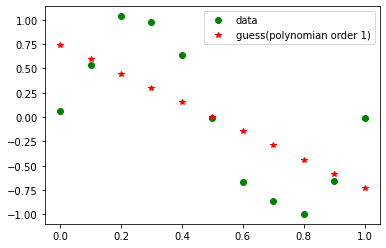

In [25]:
plt.plot(X, b, 'go',  label='data')
plt.plot(X, y1,'r*', label='guess(polynomian order 1)')
plt.legend()

### Fitting the data with M=3 order polynomial

In [26]:
m = 3
y3 = PolynomialFit(3, b)

here are the weights for M=3 order polynomial:


[ -0.03767381  10.82314551 -32.18596802  21.43388195] order polynomial:


here is the guess we found:


[-0.03767381  0.74421494  1.01098763  0.89124754  0.51359796  0.00664219
 -0.50101649 -0.88077477 -1.00402937 -0.742177    0.03338564]


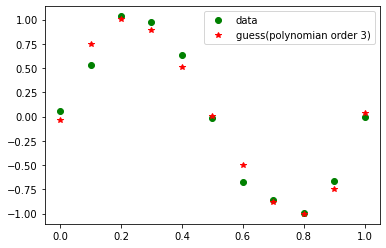

In [27]:
plt.plot(X, b, 'go',  label='data')
plt.plot(X, y3, 'r*', label='guess(polynomian order 3)')
plt.legend()

### Fitting the data with M=9 order polynomial

In [28]:
m = 9
y9 = PolynomialFit(9, b)

here are the weights for M=9 order polynomial:


[ 6.22267865e-02 -2.69447052e+01  7.48085122e+02 -6.74097559e+03
  3.15721718e+04 -8.64939926e+04  1.42728617e+05 -1.39303051e+05
  7.39796102e+04 -1.64635905e+04] order polynomial:


here is the guess we found:


[ 0.06222679  0.52943079  1.03879399  0.96765859  0.65438197 -0.03037123
 -0.65331256 -0.8730417  -0.99189227 -0.66057617 -0.00835918]


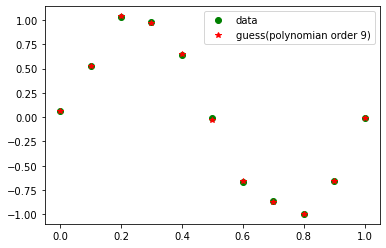

In [29]:
plt.plot(X, b, 'go',  label='data')
plt.plot(X, y9, 'r*', label='guess(polynomian order 9)')
plt.legend()

### Final plot with M=0, M=1, M=3 and M=9 

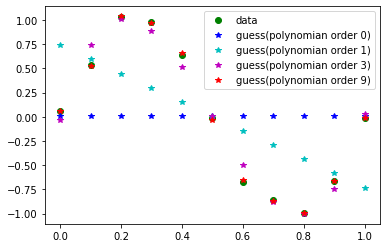

In [30]:
plt.plot(X, b, 'go',  label='data')
plt.plot(X,y0,'b*', label='guess(polynomian order 0)')
plt.plot(X,y1,'c*', label='guess(polynomian order 1)')
plt.plot(X,y3,'m*', label='guess(polynomian order 3)')
plt.plot(X,y9,'r*', label='guess(polynomian order 9)')
plt.legend()

<b> Green circles are actual data points.<br/>
    Blue stars are our guess from model M=0.<br/>
    Cyan stars are guess from model M=1.<br/>
    Magenta stars are guess from model M=3.<br/>
    Red stars are guess from model M=9.<br/><br/>
    Looking at the above plot, there is a very bad agreement of green circles with Blue(M=0) and Cyan(M=1) stars.<br/>
    We got good agreement between Magenta(M=3) stars and green circles.<br/>
    The best agreement is between Red(M=9) stars and green circles.<br/>
    It seems that as we go on increasing the polynomial order, our model is tracking pretty well to the data.</b>